# Hypothesis: 
I think that students who are NOT computer science majors and HAVE attended office hours at least once find these 1:1 appoitnments  effective in helpng them learn topics and students who are computer scince majors do not find them as effective (i.e. responded 5 or greater on the Likert scale).

In [2]:
__author__ = "730394262"

## Per the instructions, my first line of code is as follows.

In [1]:
%reload_ext autoreload
%autoreload 2

## Step 1: First I will read the csv and convert it into a column-oriented data table to make it easier to work with.

In [6]:
from data_utils import read_csv_rows, columnar

data_rows: list[dict[str, str]] = read_csv_rows('../../data/survey.csv')
columns: dict[str, list[str]] = columnar(data_rows)

## Step 2: Next, I will narrow down this table to only the relevant columns, "comp_major" and "oh_effective." These are the first ten rows:

In [35]:
from data_utils import head, select

relevant_data: dict[str, list[str]] = select(columns, ["comp_major", "oh_effective"])
head(relevant_data, 10)

{'comp_major': ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No'],
 'oh_effective': ['5', '', '', '7', '', '', '3', '4', '', '4']}

## Step 3: Then, I am going to implement a for in loop that appends the Likert responses (for every student that is NOT a computer science major AND has attended office hours) into a list of integers. 
Note that ONLY the students that are NOT computer science majors AND have attended office hours at least once are being evaluated here (i.e. empty string values "" are not included in our calculations). The list is long, but we will print it below anyway:

In [85]:
i: int = 0
notcomp_values: list[int] = []

for each in relevant_data["comp_major"]:
    if relevant_data["comp_major"][i] == "No":
        if relevant_data["oh_effective"][i] == "":
            i += 1
        else:
            notcomp_values.append(int(relevant_data["oh_effective"][i]))
            i += 1
    else:
        i += 1

print(notcomp_values)

[5, 7, 3, 4, 4, 4, 2, 7, 5, 5, 4, 7, 7, 7, 5, 4, 4, 5, 5, 6, 6, 2, 5, 7, 6, 7, 4, 5, 7, 4, 6, 4, 1, 7, 4, 7, 7, 6, 6, 7, 5, 3, 2, 7, 7, 7, 7, 7, 6, 4, 6, 3, 6, 7, 6, 4, 4, 4, 5, 6, 7, 7, 7, 6, 2, 6, 7, 5, 5, 3, 7, 1, 4, 7, 7, 6, 5, 7, 4, 4, 4, 6, 5, 4, 7, 6, 4, 7, 7, 4, 6, 7, 6, 6, 4, 7, 6, 4, 3, 5, 2, 4, 6, 7, 6, 7, 7, 4, 7, 5, 6, 6, 6, 5, 7, 7, 7, 6, 7, 7, 5, 5, 2, 4, 5, 6, 5, 2, 7, 6, 7, 6, 7, 4, 7, 7, 7, 3, 4, 2, 4, 5, 4, 4, 7, 4, 5, 5, 5, 4, 6, 6, 6, 5, 7, 6, 7, 7, 7, 4, 7, 4, 6, 6, 4, 6, 3, 7, 2, 7, 7, 3, 5, 3, 5, 6, 7, 6, 6, 4, 5, 7, 7, 5, 2, 6, 7, 5, 7, 7, 5, 7, 7, 3, 7, 4, 4, 5, 7, 5, 7, 7, 6, 6, 4, 5, 6, 1, 3, 6, 5, 7, 7, 7, 5, 4, 7, 5, 7, 6, 5, 4, 7, 4, 4, 5, 7, 5, 5, 7, 5, 3, 3, 6, 6, 5, 7, 7, 4, 6, 6, 6, 7, 7, 4, 7, 7, 7, 7, 7, 7, 6, 5, 1, 6, 7, 7, 6, 5, 6, 6, 5, 6, 7, 6, 7, 7, 5, 7]


## Step 4: Now I am going to divide the sum of all the Likert responses by the total number of entries (a.k.a the length of the list) to obtain an average.

In [78]:
average_oh: float = sum(notcomp_values) / len(notcomp_values)
print(f"The average Likert response for non-comp-sci majors who attended office hours is: {average_oh}")

The average Likert response for non-comp-sci majors who attended office hours is: 5.449814126394052


## Step 5.0: I want to compare this average to the average for students that are computer science majors. To do this, let's repeat steps 3 and 4, but this time, calculating the data for students who are computer science majors (BA and BS included, responses of "maybe" and "yes - minor" are excluded).
I will print the list below so I know that I am on the right track:

In [80]:
i_2: int = 0
comp_values: list[int] = []

for each in relevant_data["comp_major"]:
    if relevant_data["comp_major"][i_2] != "No":
        if relevant_data["comp_major"][i_2] == "Yes - Minor":
            i_2 += 1
        elif relevant_data["oh_effective"][i_2] == "":
            i_2 += 1
        else:
            comp_values.append(int(relevant_data["oh_effective"][i_2]))
            i_2 += 1
    else:
        i_2 += 1


print(comp_values)

[3, 6, 7, 5, 2, 7, 7, 7, 7, 2, 3, 7, 6, 7, 5, 5, 5, 5, 7, 5, 7, 4, 5, 4, 5, 4, 7, 6, 7, 7, 7, 4, 2, 7, 7, 4, 7, 3, 5, 6, 6, 5, 4, 6, 4, 7, 7, 4, 4, 7, 7, 4, 4, 7, 5, 3, 7, 7, 5, 4, 4, 7, 6, 7, 4, 7, 6, 7, 6, 7, 4, 7, 5, 4, 4, 4, 6]


## Step 5.1: Now repeat Step 4 to obtain an average.

In [81]:
average_oh_2: float = sum(comp_values) / len(comp_values)
print(f"The average Likert response for comp-sci majors who attended office hours is: {average_oh_2}")

The average Likert response for comp-sci majors who attended office hours is: 5.428571428571429


## Step 6: I will import and use the countint custom function from data_utils to create data sets for comp-sci AND non-comp-sci responses. My goal is to use these sets in two histograms and compare distributions.
Note: I had to modify the count function to allow ints to be accepteed as keys since the responses ranged from 1 to 7, incrementing by 1. The count function we defined in class only accepts str as keys. I could still use count() to see how many students responded to each of the "comp_major" options, although this doesn't add much value to my analysis. A demonstration of this function is included at the bottom of the following code listing as a proof of concept.

In [101]:
from data_utils import countint, count

notcomp_dataset: dict[int, int] = countint(notcomp_values)
print(f"The data for non-comp-sci majors is: {notcomp_dataset}")

comp_dataset: dict[int, int] = countint(comp_values)
print(f"The data for comp-sci majors is: {comp_dataset}")

# Using the standard count() function as a proof of concept
major_responses: dict[str, int] = count(relevant_data["comp_major"])
print(f"The data for students' majors is: {major_responses}")

The data for non-comp-sci majors is: {1: 4, 2: 10, 3: 13, 4: 46, 5: 48, 6: 57, 7: 91}
The data for comp-sci majors is: {1: 0, 2: 3, 3: 4, 4: 18, 5: 13, 6: 10, 7: 29}
The data for students' majors is: {'No': 404, 'Yes - Minor': 33, 'Yes - BS': 88, 'Yes - BA': 48}


## Step 7: Now I will import seaborn and create a chart that acts as a histogram that displays the distribution of responses for non-comp-sci majors.

Chart for non-comp-sci majors: 
X-axis: Likert respons
Y-axis: Count


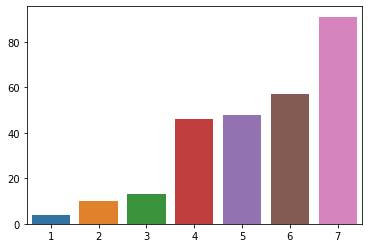

In [120]:
import seaborn

seaborn.barplot(x=[1, 2, 3, 4, 5, 6, 7], y=[notcomp_dataset[1], notcomp_dataset[2], notcomp_dataset[3], notcomp_dataset[4], notcomp_dataset[5], notcomp_dataset[6], notcomp_dataset[7]])
print("Chart for non-comp-sci majors: \nX-axis: Likert respons\nY-axis: Count")

## Step 8: Repeat Step 7, this time for comp-sci majors.

Chart for comp-sci majors: 
X-axis: Likert respons
Y-axis: Count


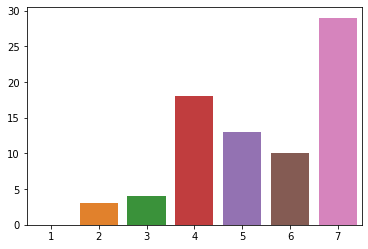

In [121]:
seaborn.barplot(x=[1, 2, 3, 4, 5, 6, 7], y=[comp_dataset[1], comp_dataset[2], comp_dataset[3], comp_dataset[4], comp_dataset[5], comp_dataset[6], comp_dataset[7]])
print("Chart for comp-sci majors: \nX-axis: Likert respons\nY-axis: Count")

## Step 9: Out of curiosity, let's create a helper function to just view the students who found office hours ineffective (i.e. responded 3 or below). I want to total the number of non-comp-sci majors who found office hours ineffective in helping them learn concepts.

In [109]:
from data_utils import disagree_helper

notcomp_less_4: dict[int, int] = disagree_helper(notcomp_values, 4)
print(notcomp_less_4)

disagree_sum: int = 0
for key in notcomp_less_4:
    disagree_sum += notcomp_less_4[key]

print(f"The total number of non-comp-sci majors who found office hours ineffective is: {disagree_sum}")

{3: 13, 2: 10, 1: 4}
The total number of non-comp-sci majors who found office hours ineffective is: 27


## Step 10: CONCLUSION
After evaluating the data, it is clear that both students that are computer science majors and those that are not find office hours equally as effective in helping them learn concepts. This is mainly demonstrated by the fact that the average Likert response was about the same regardless of major. For non-comp-sci majors it was an average of about 5.450 compared to 5.429. The charts in Steps 7 and 8 help visualize the similarities as well, and both are of a similarly-skewed distribution. 

I was surprised by these findings because I assumed computer science majors would need less help or have more resources outside of class to succeed and learn concepts. One thing that did not surprise me is that non-comp-sci majors found office hours very helpful. I assumed that most people who are not in the major have less resources outside of the course to succeed and therefore may seek practice and help through office hours. Only 27 non-comp-sci students found these appointments unhelpful, so clearly the OH team of TAs is doing something right during these 1:1 appointment times.

These results can inform the class that office hours are a good place to recieve help regardless of one's major, according to students. This should encourage those who are not intending to major in comp-sci to use office hours to their advantage. In the future, I would like to repeat this process and evaluate if pror experience with programming has an impact of how helpful office hours are perceived to be. Would a student with 7 years of programming experience find office hours helpful or a waste of time? My findings warrant further questions like these.